<a href="https://colab.research.google.com/github/komorimasashi/time_series_book/blob/main/chapter2/Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 時系列分析の基本操作

必要なパッケージのインストール

In [23]:
targetPackages <- c('forecast', 'forecast', 'tsibble', 'gtrendsR') 
newPackages <- targetPackages[!(targetPackages %in% installed.packages()[,"Package"])]
if(length(newPackages)) install.packages(newPackages)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
# 2.1.4 データの読み込み

# 本の中では下のソースで書かれている
# tmp <- read.csv("dat.csv", fileEncoding='CP932', header=TRUE, skip=3)

# Github上のデータファイル(文字コードはShift-JIS(CP932))を読み込んで表示する
URL <- "https://raw.githubusercontent.com/komorimasashi/time_series_book/51834306ffd7b5085d65e8058476ae2c65f98276/data/dat.csv"
tmp <- read.csv(URL, fileEncoding='CP932', header=TRUE, skip=3)
print(tmp)

         DAY SCORE CITY
1   2021/1/1   5.3 京都
2   2021/1/2   3.6 京都
3   2021/1/3  10.6 京都
4   2021/1/4   9.2 大阪
5   2021/1/5   8.9 大阪
6   2021/1/6   2.4 大阪
7   2021/1/7   3.3 大阪
8   2021/1/8   1.5 神戸
9   2021/1/9   7.1 神戸
10 2021/1/10   7.9 京都
11 2021/1/11   3.0 京都
12 2021/1/12   4.7 大阪


In [11]:
# 2.2.1　モードとクラス

# ベクトルを作成します．ベクトルを作成するときはc()を使います
x <- c(1, 3, 5, 7, 9)
y <- c(6:10)
print(x)
print(y)
typeof(x) # type型
mode(x) # mode型
class(x) # class型
is.vector(x)

# ベクトルを列方向で連結すると行列オブジェクトになります
m <- cbind(x , y)
typeof(m) # type型
mode(m) # mode型
class(m) # class型
is.vector(m)
is.matrix(m)

# データフレームクラスのデータを作成します
df <- data.frame(X=x, Y=y)
print(df)
typeof(df) # type型
mode(df) # mode型
# ベクトル以外のオブジェクトに対してmode()を実行するとtypeof()と同じ出力になります
class(df) # class型

[1] 1 3 5 7 9
[1]  6  7  8  9 10


[1] "double"

[1] "numeric"

[1] "numeric"

[1] TRUE

[1] "double"

[1] "numeric"

[1] "matrix" "array"

[1] FALSE

[1] TRUE

  X  Y
1 1  6
2 3  7
3 5  8
4 7  9
5 9 10


[1] "list"

[1] "list"

[1] "data.frame"

In [12]:
# 2.2.2　型の変換

x <- c(1, 3, 5, 7, 9)
c <- as.character(x)
mode(c) # mode型

m <- cbind(c(1,2,3),c(4,5,6))
df <- as.data.frame(m)
typeof(df) # type型
mode(df) # mode型
class(df) # class型


[1] "character"

[1] "list"

[1] "list"

[1] "data.frame"

Time difference of 4118 days

[1] "2011-03-11"

[1] "2011-03-11"

[1] "2011-03-11"

[1] "2011-03-11"

[1] "2011-03-11"

[1] "2011年03月11日Friday"

[1] "2020-12-25" "2020-12-26" "2020-12-27" "2020-12-28" "2020-12-29"
 [6] "2020-12-30" "2020-12-31" "2021-01-01" "2021-01-02" "2021-01-03"
[11] "2021-01-04" "2021-01-05" "2021-01-06" "2021-01-07" "2021-01-08"
[16] "2021-01-09" "2021-01-10"

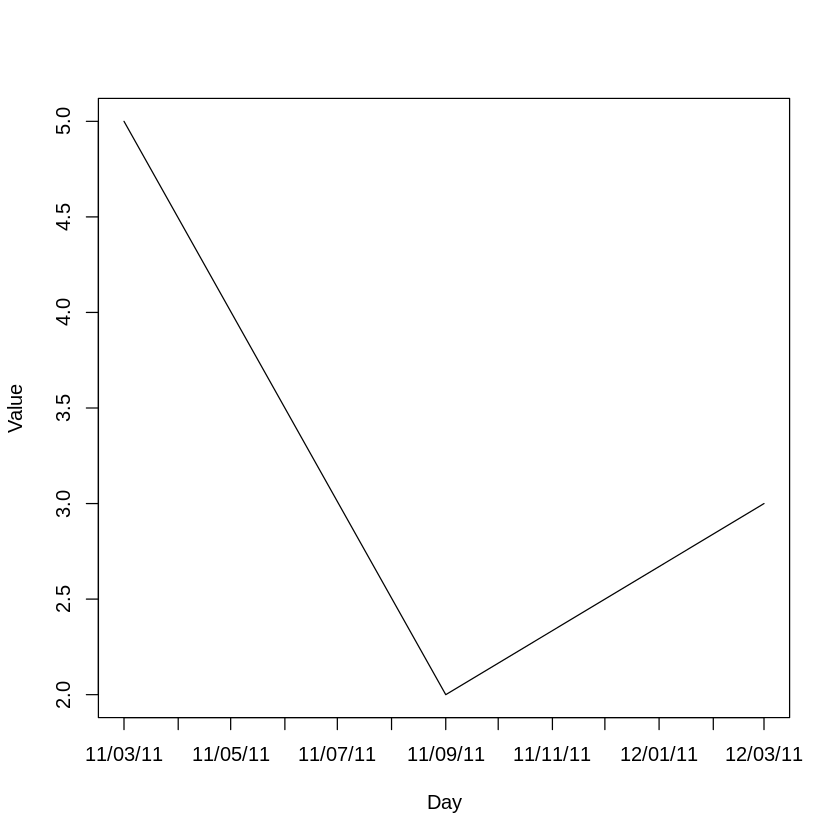

In [13]:
#　2.3.1　日付や時刻を扱うクラス
# Dateクラス
today <- Sys.Date() # 今日の日付をDateクラスとして取得します
d <- as.Date("2011-03-11") # 東日本大震災の日をDateクラスに変換します
today- d # 東日本大震災から何日経過したかがわかります

as.Date("2011年3月11日", format="%Y年%m月%d日")
as.Date("11ねん3がつ11にち", format="%yねん%mがつ%dにち")
as.Date("March 11, 2011", format="%B %d, %Y")
as.Date("11 Mar, 2011", format="%d %b, %Y")
as.Date("11/3/2011", format="%d/%m/%Y")

d = as.Date("2011-03-11")
format(d, "%Y年%m月%d日%A") # %Aや%aは曜日を示します

x <- as.Date(c("2011-03-11","2011-09-11","2012-03-11"))
y <- c(5,2,3)
plot(x,y,type="l",xlab="Day",ylab="Value", xaxt="n")
# "month"を"year"や"day"に変更すると刻みを変えることができます
axis.Date(1,at=seq(min(x),max(x),"month"),format="%y/%m/%d")

seq(as.Date("2020-12-25"), as.Date("2021-01-10"), by = "day")

[1] 1655661097

[1] "2011-03-11 14:46:18 UTC"

[1] "2011-03-11 14:46:18 JST"

[1] "2011-03-11 14:46:18 JST"

[1] "2011-03-11 00:46:18 EST"

[1] "2011-03-11 14:46:18 JST"

[1] "2011-03-11 14:46:18 JST"

[1] "2022-06-20 14:46:18 JST"

[1] "Mar 11 Friday 02:46:18 PM 2011 JST"

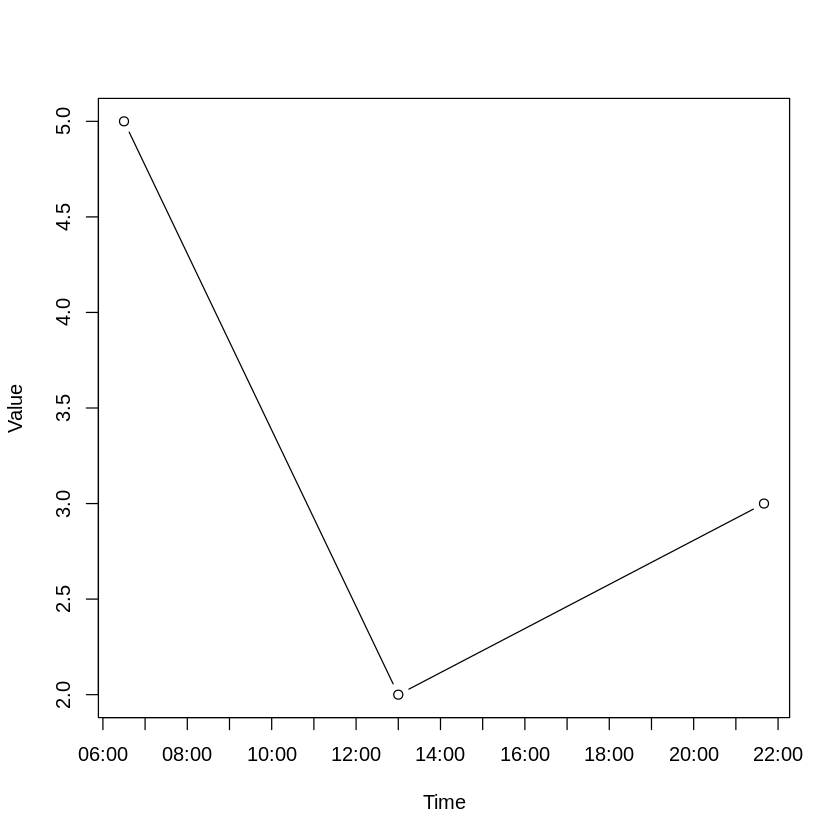

In [14]:
#　2.3.1　日付や時刻を扱うクラス
# POSIXctクラスとPOSIXltクラス
as.numeric(as.POSIXct(Sys.time()))
as.POSIXct("2011-03-11 14:46:18")
as.POSIXct("2011-03-11 14:46:18", tz="Japan") # JSTになります
as.POSIXct("2011-03-11 14:46:18", tz="Asia/Tokyo") # JSTになります

t <- as.POSIXct("2011-03-11 14:46:18", tz="Japan")
as.POSIXlt(t, tz="EST") # アメリカ東部標準時で表示 (夏時間なし)

as.POSIXct("2011年3月11日14時46分18秒", format="%Y年%m月%d日%H時%M分%S秒", tz="Japan")
as.POSIXct("2011-03-11 14:46:18", format="%Y-%m-%d %H:%M:%S", tz="Japan")
# 日付を指定しなければ現在の日付になる
as.POSIXct("14:46:18", format="%H:%M:%S", tz="Japan")

t <- as.POSIXct("2011-03-11 14:46:18", tz="Japan")
# %Aや%aは曜日を表示する．%Xは24時間制の時刻を表示する
format(t, "%b %d %A %X %Y %Z")

x <- as.POSIXct(c("6:30","13:00","21:40"), format="%H:%M")
y <- c(5,2,3)
plot(x, y, type="b", xlab="Time", ylab="Value", xaxt="n")
par(xaxt="s")
start_time <- as.POSIXct("0:00",format="%H:%M")
end_time <- as.POSIXct("24:00",format="%H:%M")
axis.POSIXct(1, at=seq(start_time, end_time, "hour"), format="%H:%M")

[1] "ts"

[1] 1960    1

[1] 1986    4

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



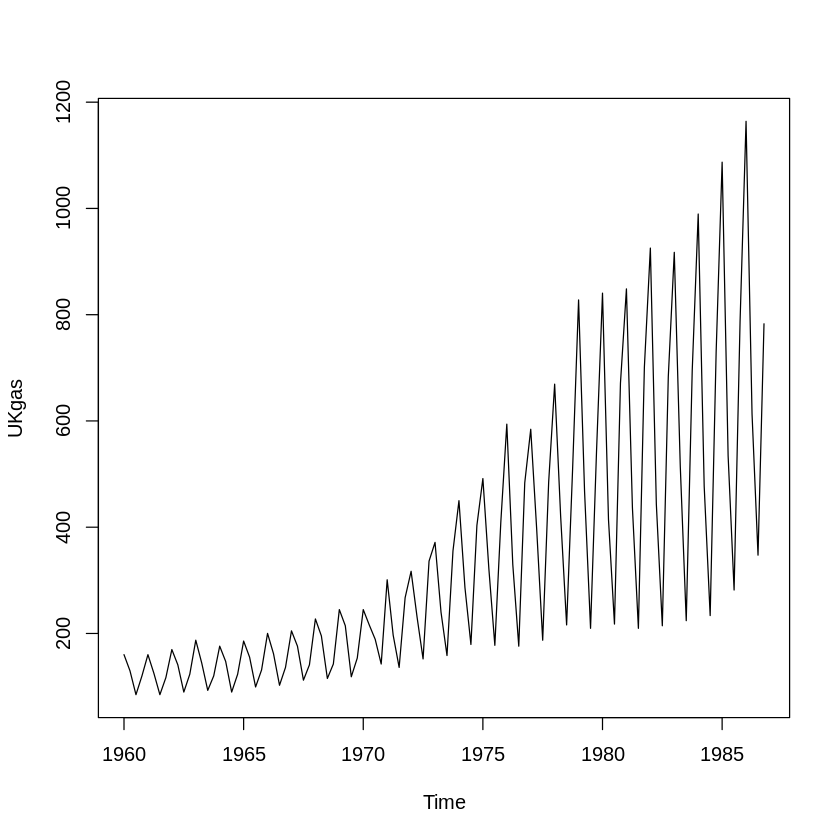

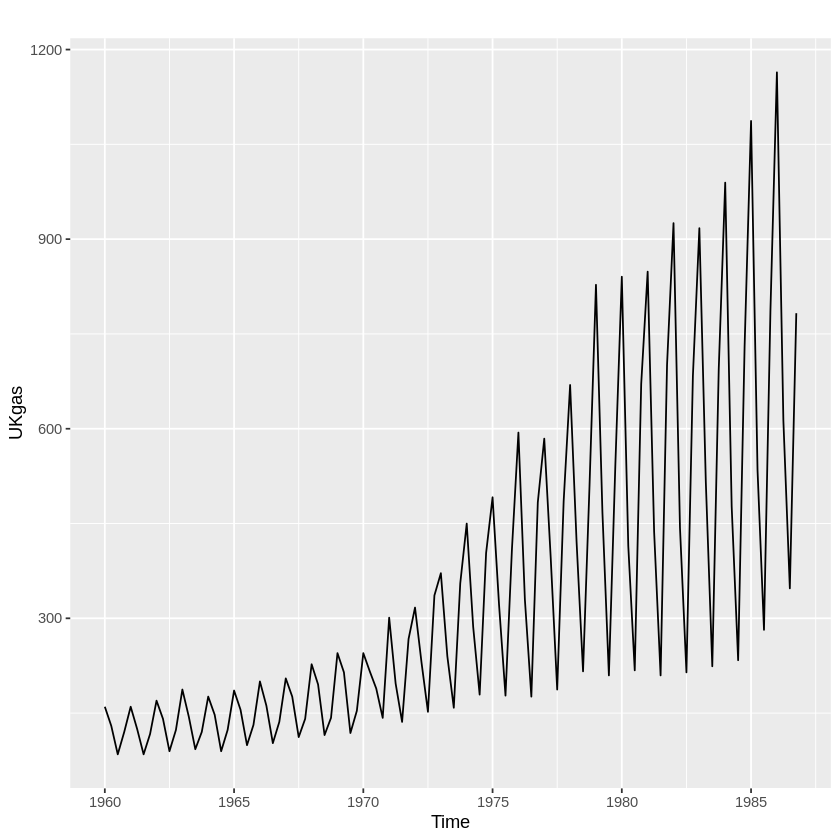

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,1.084099,1.927208,2.421597,1.648581,4.552397,5.461281,4.498204,4.309916,5.730290,6.716728,6.266788,7.338454
2021,6.921883,6.492743,6.376085,,,,,,,,,


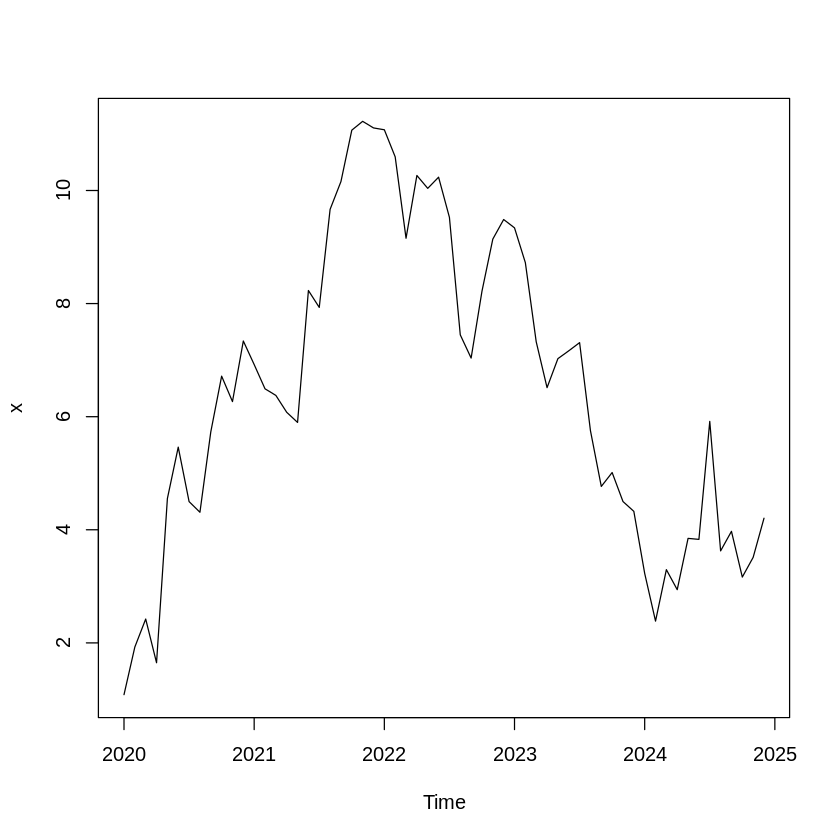

In [15]:
# 2.3.2　時系列データを取り扱うためのクラス

# tsクラス
data(UKgas)
class(UKgas) # たしかに"ts"クラスです
# tsクラスのオブジェクトをプロットするときにはts.plot()を使います
ts.plot(UKgas)
# データ取得開始の（年，四半期）がベクトルとして入っています
start(UKgas)
# データ取得終了の（年，四半期）がベクトルとして入っています
end(UKgas)


library(forecast)
autoplot(UKgas)

# 2020年1月から60ヵ月分の観測値の仮想データ（ランダムウォーク）
set.seed(9999)
x <- ts(data =　cumsum(rnorm(n=60)), start=c(2020,1), frequency=12)
ts.plot(x)

window(x,c(2020,1),c(2021,3))

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘tsibble’


The following objects are masked from ‘package:base’:

    intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




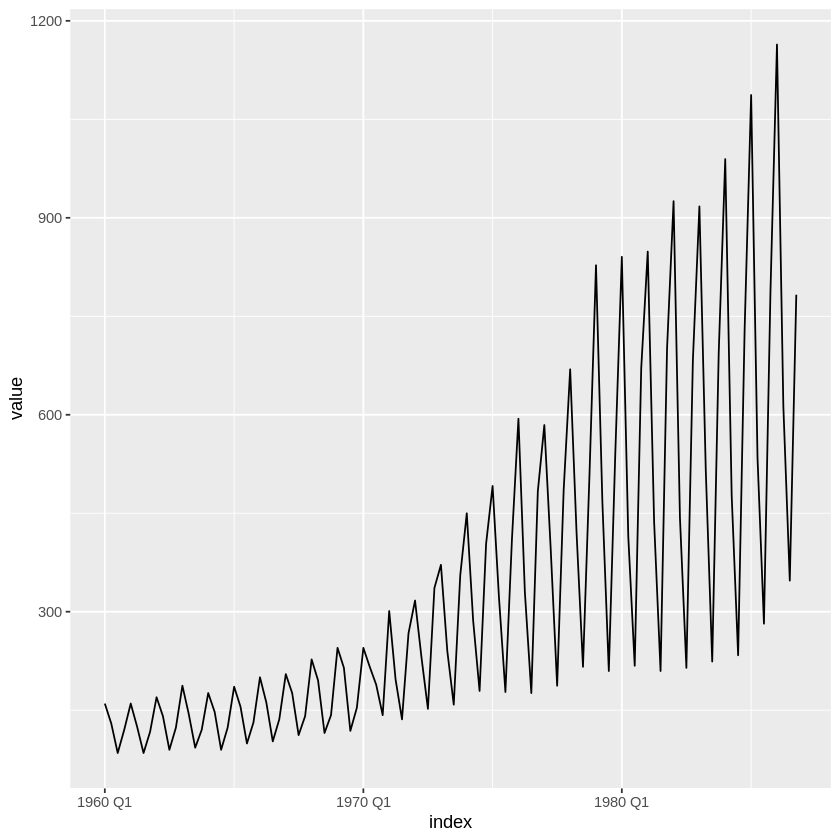

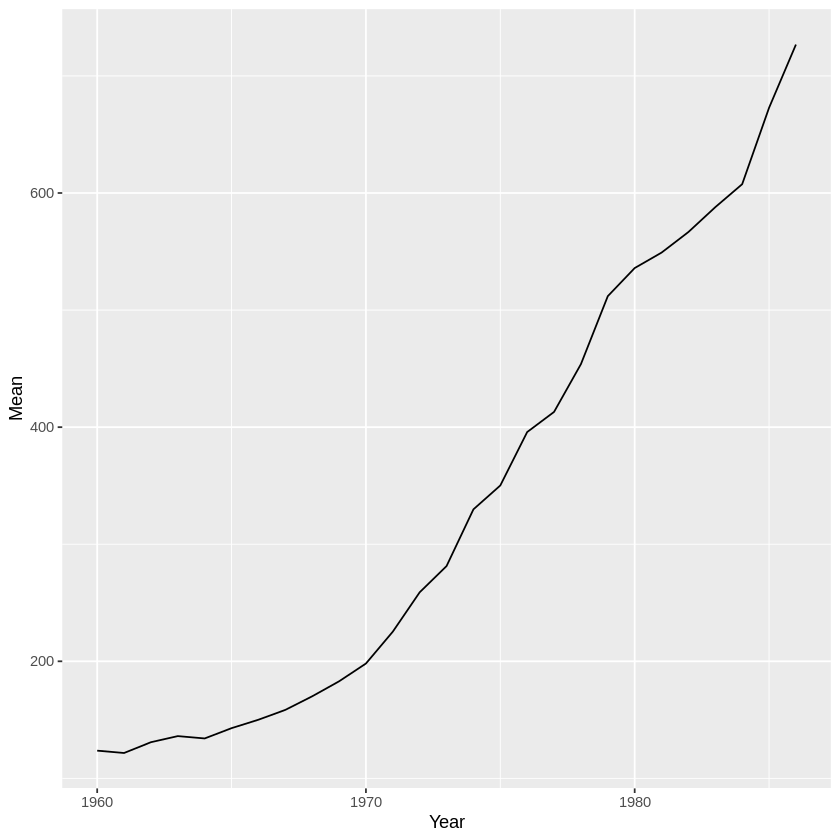

In [16]:
# 2.3.2　時系列データを取り扱うためのクラス
# 時系列を整然データとして扱うクラス

library(tsibble)
library(dplyr)
library(ggplot2)

# UKgasデータをtbl_tsクラスに変換しggplot2で描画しています

UKgas %>%
  as_tsibble　%>%
  ggplot()　+ geom_line(aes(x = index, y = value))

# UKgasデータをtbl_tsクラスに変換，年ごとに平均値を集計しggplot2で描画しています
UKgas %>%
  as_tsibble　%>%
  # index_by()は{dplyr}のgroup_by()の時系列版です
  index_by(Year = ~ year(.)) 　%>%
  summarise(Mean = mean(value)) %>%
  ggplot()　+ geom_line(aes(x = Year, y = Mean))


In [18]:
# 2.4.1　時系列データの操作
#ラグ
# tsクラスのオブジェクトのラグを求めるときはstats::lag()を使う
# 2020年1月からの配列
x <-ts(1:120,start=c(2020,1),frequency=12)
# 1年前にずらしたデータ(2019年1月から開始される)
stats::lag(x, k=12)
# tsクラス以外のオブジェクトのラグを求めるにはdplyr::lag()を使う
library(dplyr)
x <- 1:10
dplyr::lag(x, k=1)

# ラグ系列でデータフレームを作成する
data.frame(x = 1:10) %>%
  dplyr::mutate(lead=lead(x, k=1)) %>%
  dplyr::mutate(lag=lag(x, k=1))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,1,2,3,4,5,6,7,8,9,10,11,12
2020,13,14,15,16,17,18,19,20,21,22,23,24
2021,25,26,27,28,29,30,31,32,33,34,35,36
2022,37,38,39,40,41,42,43,44,45,46,47,48
2023,49,50,51,52,53,54,55,56,57,58,59,60
2024,61,62,63,64,65,66,67,68,69,70,71,72
2025,73,74,75,76,77,78,79,80,81,82,83,84
2026,85,86,87,88,89,90,91,92,93,94,95,96
2027,97,98,99,100,101,102,103,104,105,106,107,108
2028,109,110,111,112,113,114,115,116,117,118,119,120


[1] NA  1  2  3  4  5  6  7  8  9

x,lead,lag
<int>,<int>,<int>
1,2,NA
2,3,1
3,4,2
4,5,3
5,6,4
6,7,5
7,8,6
8,9,7
9,10,8


In [19]:
# 2.4.1　時系列データの操作
# 階差
x <- cumsum(0:10) # 時系列(0,1,3,6,10,15,21,28,36,45,55)
diff(x, lag=1, differences=1) # 1階階差（等差数列になる）
diff(x, lag=1, differences=2) # 2階階差（すべて1になる）

[1]  1  2  3  4  5  6  7  8  9 10

[1] 1 1 1 1 1 1 1 1 1

Warning message:
“Removed 6 row(s) containing missing values (geom_path).”


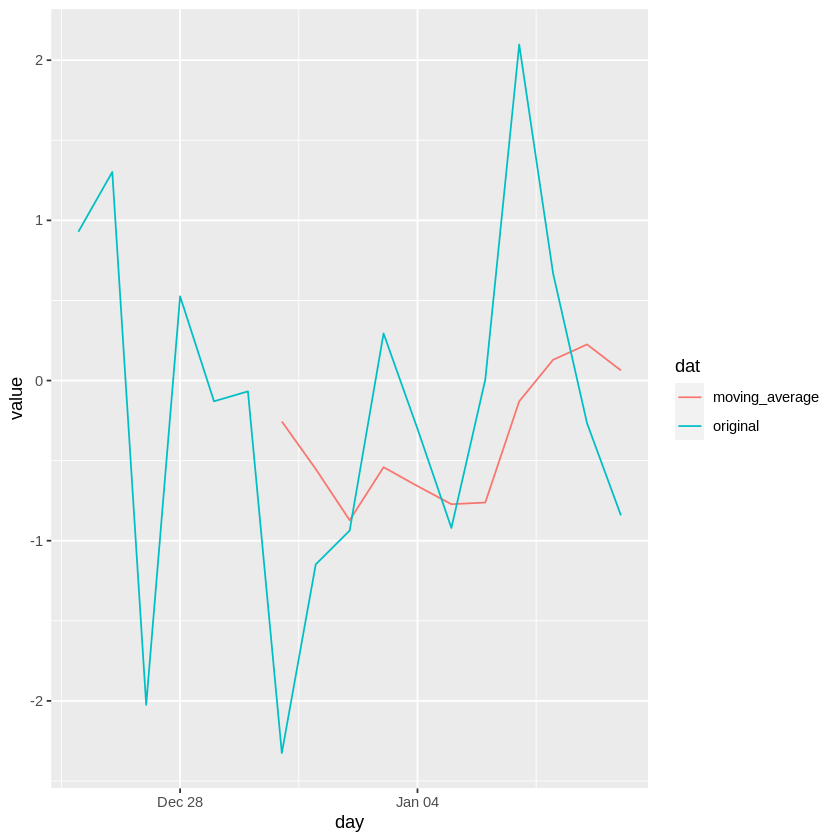

In [21]:
library(zoo)
library(dplyr)
library(ggplot2)
library(tidyr)


#データの作成
day <- seq(as.Date("2020-12-25"), as.Date("2021-01-10"), by = "day")
dat.original <- rnorm(length(day))

#移動平均
dat.moving_average <-  zoo::rollmean(dat.original, 7, align = "right", fill = NA)

#データフレームの作成する
df <- data.frame(day = day) %>%
  dplyr::mutate(original = dat.original) %>%
  dplyr::mutate(moving_average = dat.moving_average) %>%
  pivot_longer(-day, names_to = "dat", values_to = "value")

#作図
ggplot(df,aes(day)) + geom_line(aes(y = value, colour = dat))


In [22]:
# 2.4.4　移動相関

library(zoo)
# 相関係数を求めるcorrelationという名前の関数を作成する
correlation <- function(x) {
  return(cor(x[,1],x[,2]))
}
# データフレームの作成（2つの系列は正規乱数で作成している）
df <- data.frame(x1 = rnorm(50), x2= rnorm(50))
# zooのrollapplyr()関数で窓長20の相関分析(correlation)を順に適用
zoo::rollapplyr(df, width=20, FUN=correlation, by.column=F)

[1]  0.04341213 -0.14528078 -0.10930399 -0.14156369 -0.16449131 -0.15435444
 [7] -0.15873842 -0.03866038 -0.03859157 -0.03983450 -0.06374606 -0.03433805
[13] -0.03699481 -0.02731896 -0.02802626 -0.07057325 -0.26327124 -0.13845045
[19] -0.28678633 -0.45939632 -0.24589672 -0.21033200 -0.17210855 -0.16413325
[25] -0.16739524 -0.16526287 -0.13969603 -0.08063813 -0.11585497 -0.09153141
[31] -0.21377416

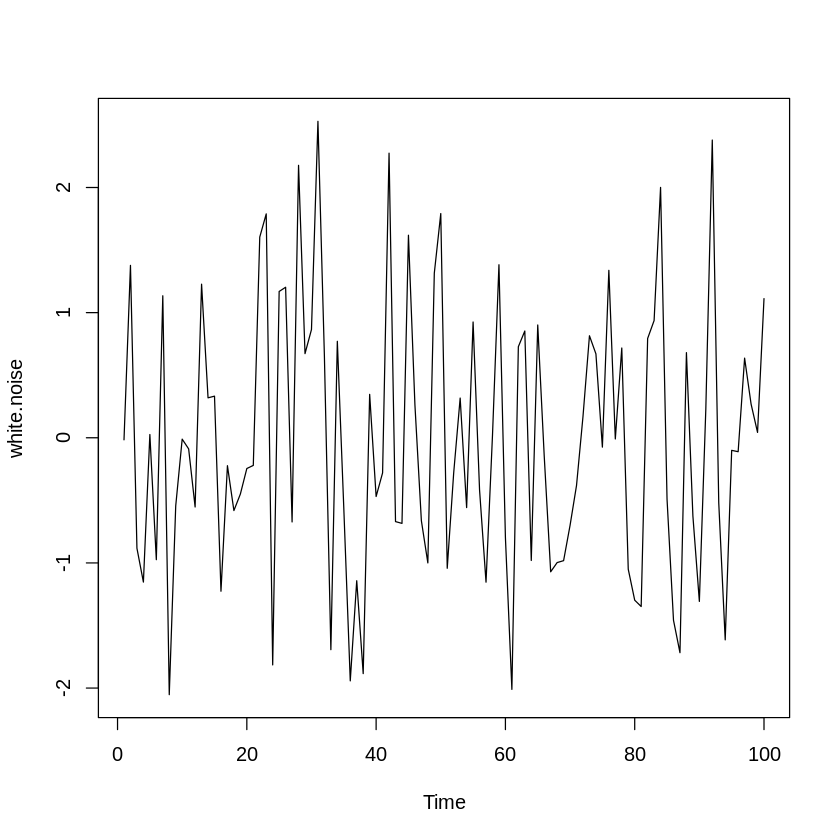

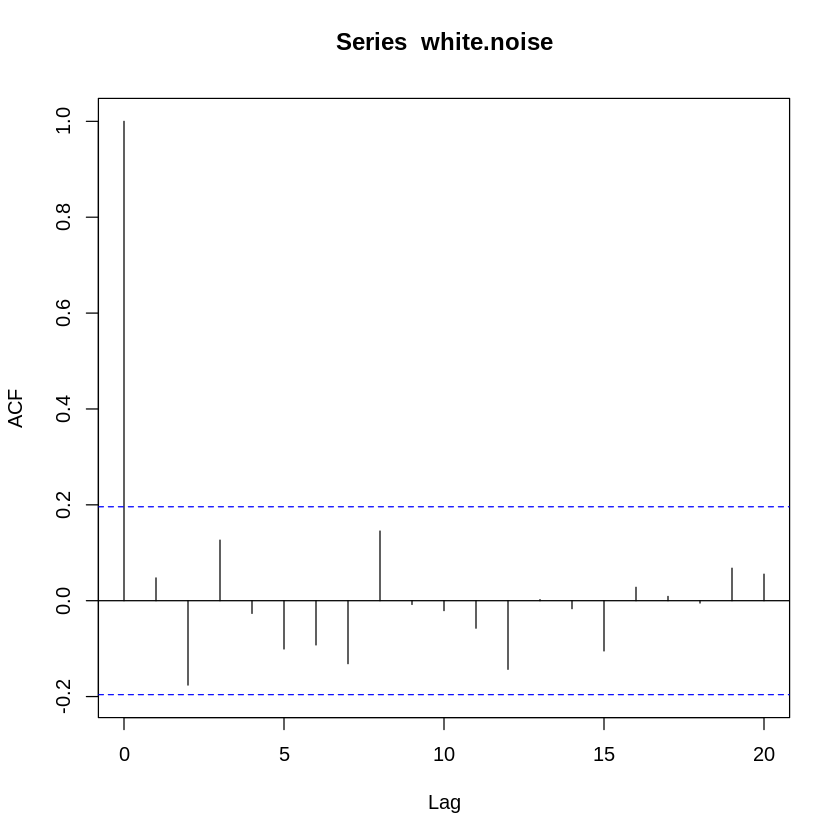

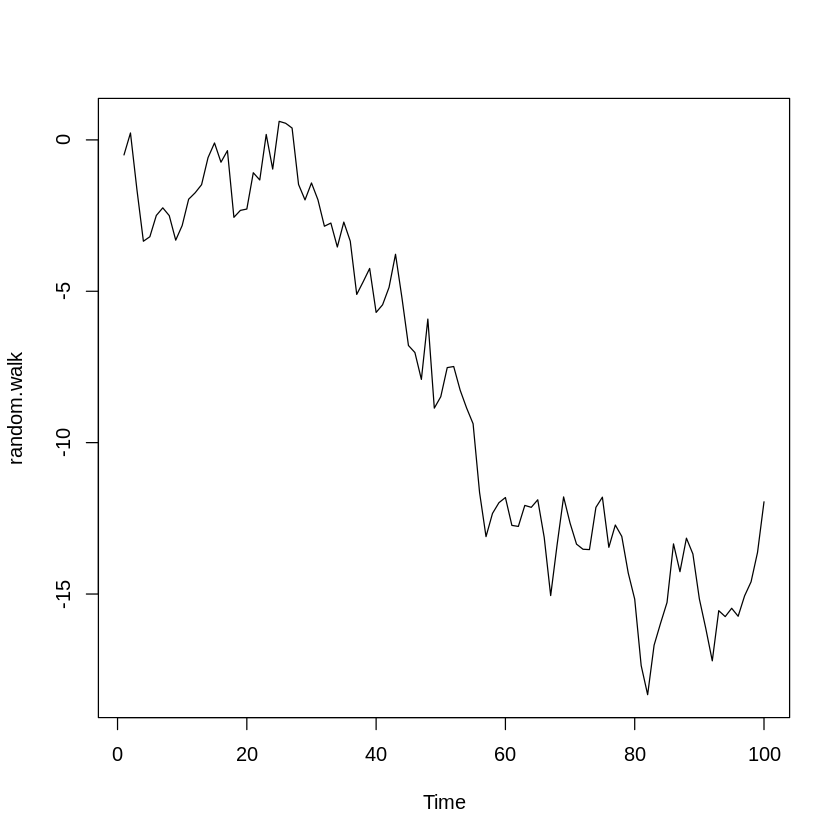

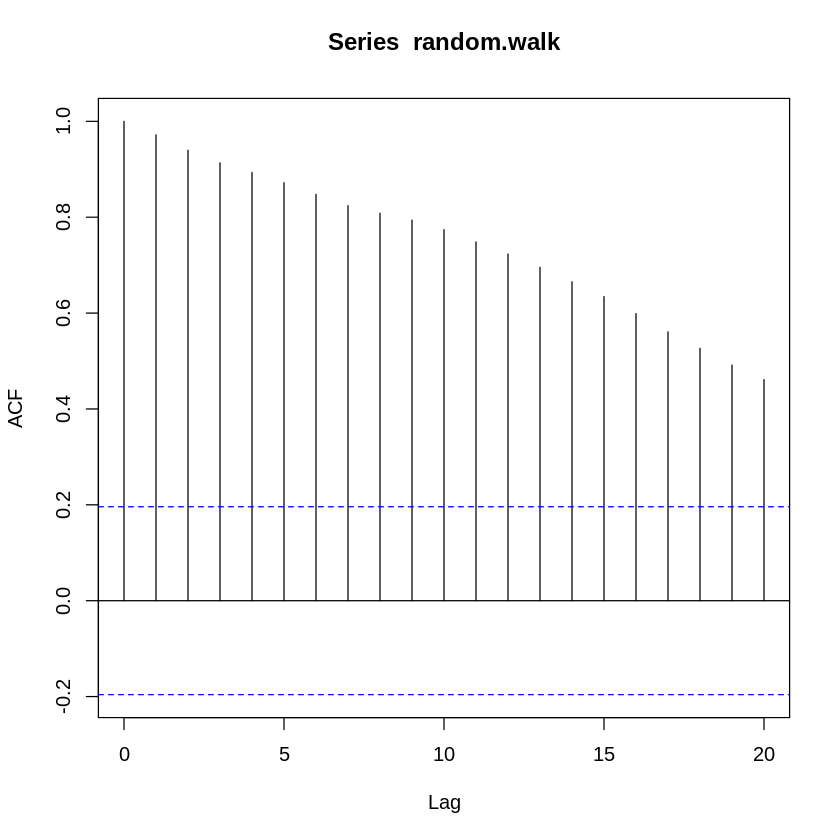

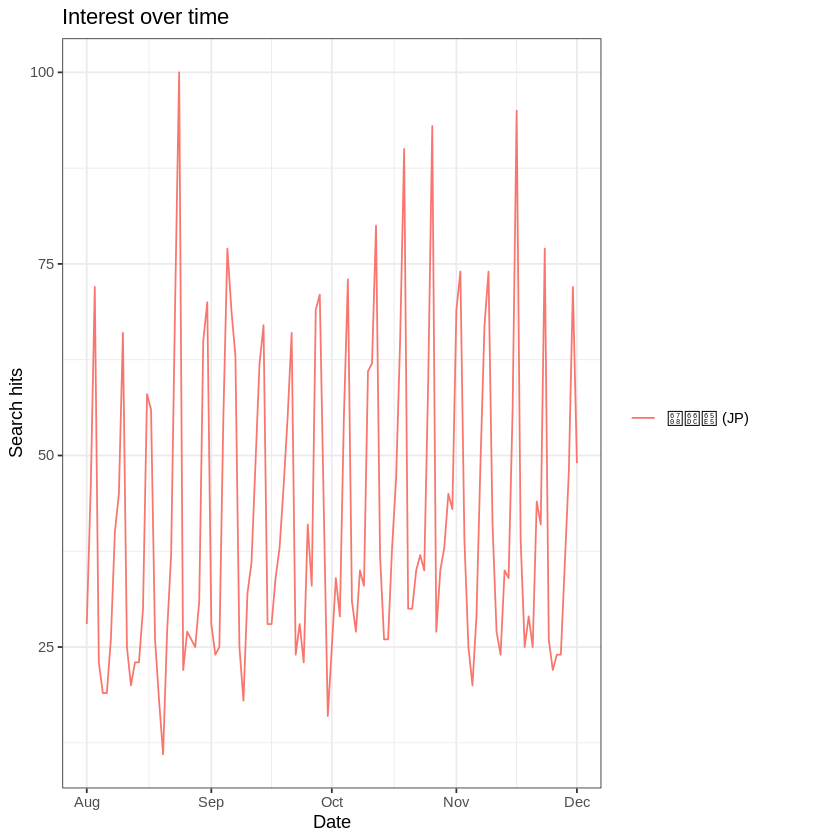

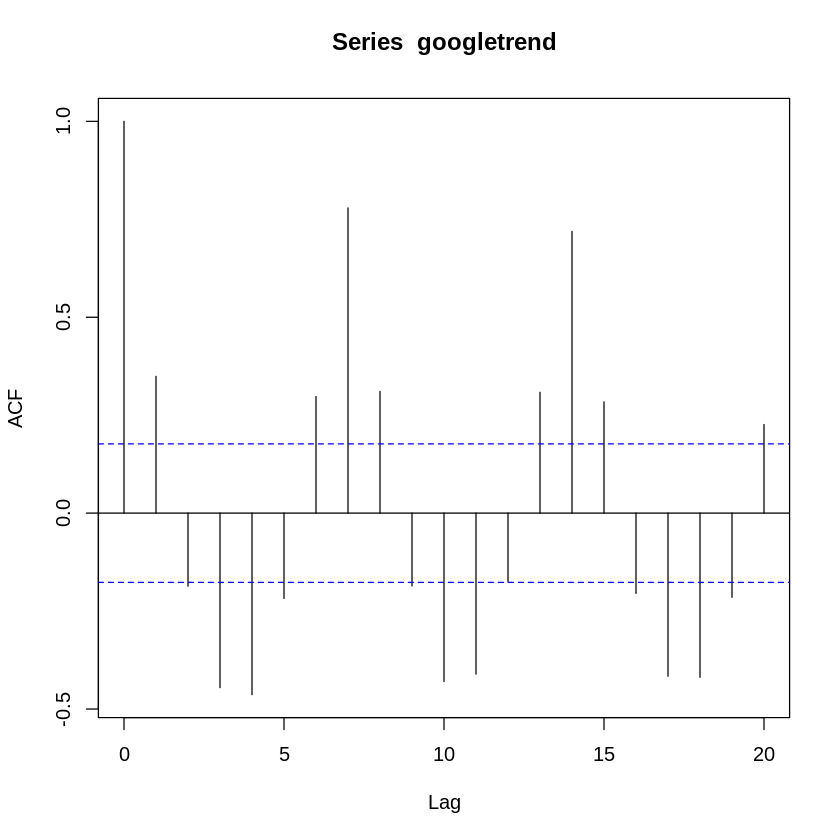

In [24]:
# 2.4.5　自己相関

#ホワイトノイズの自己相関

#White noiseの作成
white.noise <- rnorm(100)
ts.plot(white.noise)
###自己相関関数
acf(white.noise)

#ランダムウォーク
#random walkの作成
random.walk <- cumsum(rnorm(100))
ts.plot(random.walk)
acf(random.walk)

#季節成分の含まれたデータ
library(gtrendsR)
trend <- gtrends(
  keyword = "月曜日",  # 検索キーワード
  geo = "JP",  # 検索地域
  time =  "2020-08-01 2020-12-01" #取得期間
)
plot(trend)
googletrend <- trend$interest_over_time$hits
acf(googletrend)


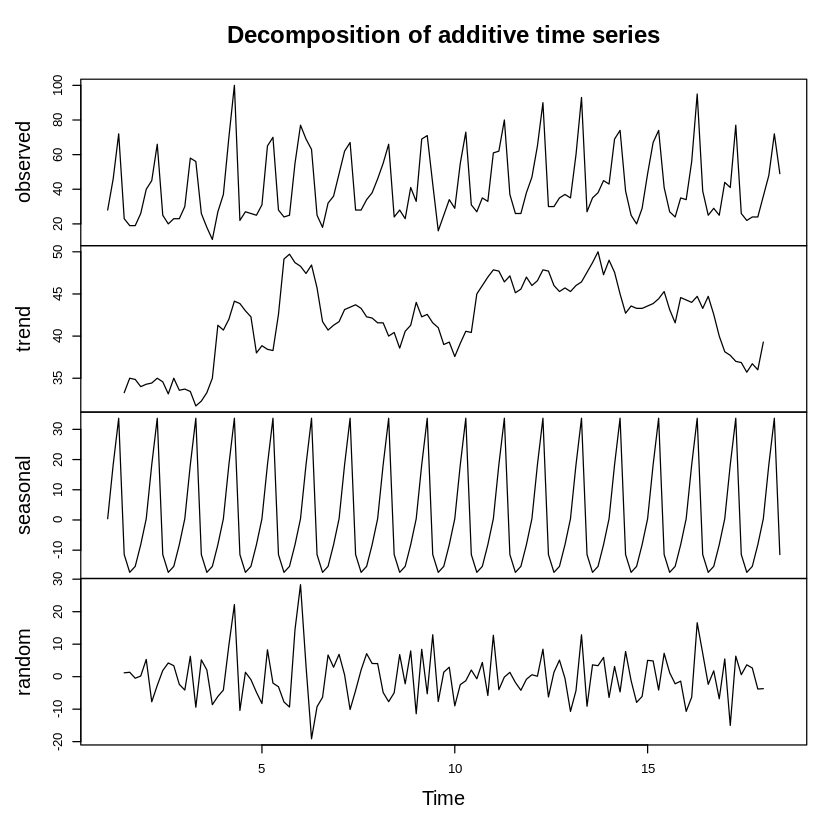

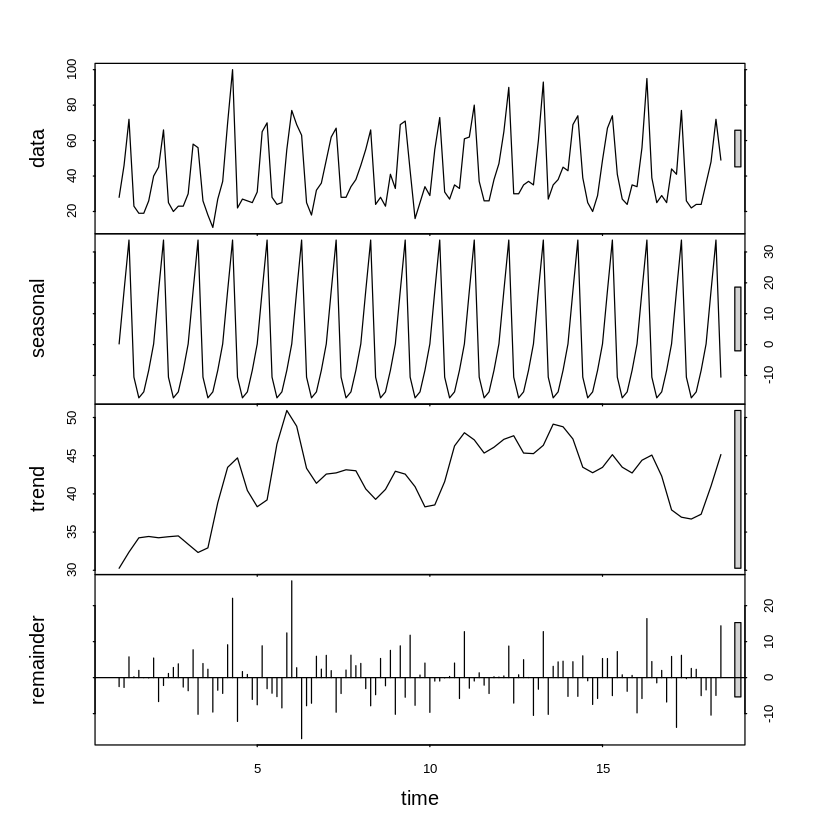

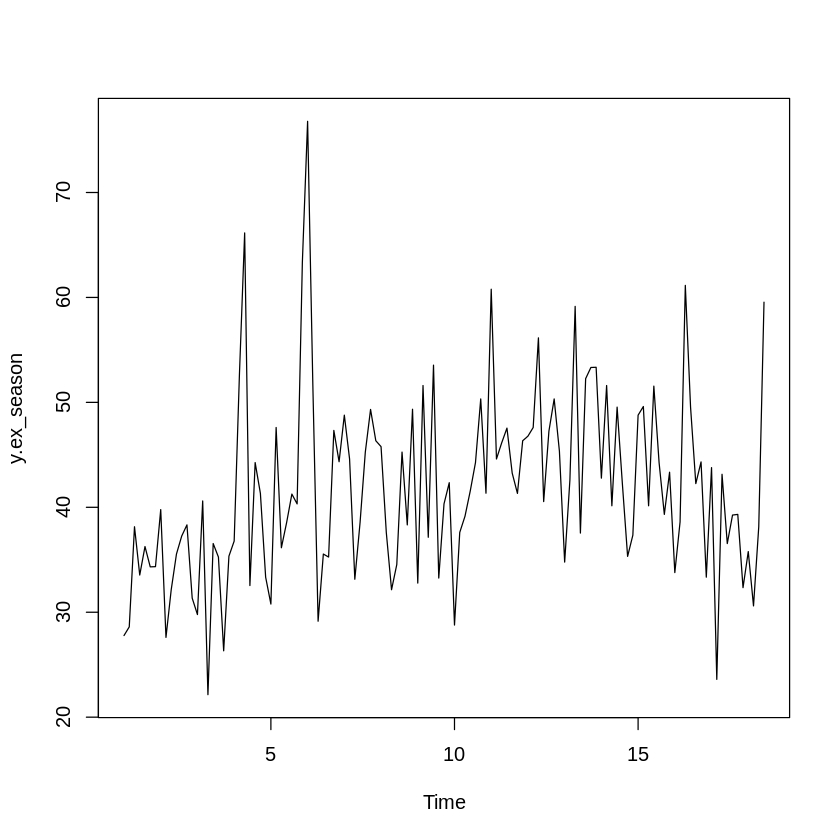

In [25]:
# 2.5　時期列の分解

# decompose関数
y <- ts(googletrend, frequency=7)
y.decomp <- decompose(y,type="additive")
plot(y.decomp)


# stl関数
y.stl <- stl(y, s.window="periodic")
plot(y.stl)
#季節調整後のデータ
y.ex_season <- y.stl$time.series[,"trend"]+y.stl$time.series[,"remainder"]
plot(y.ex_season)


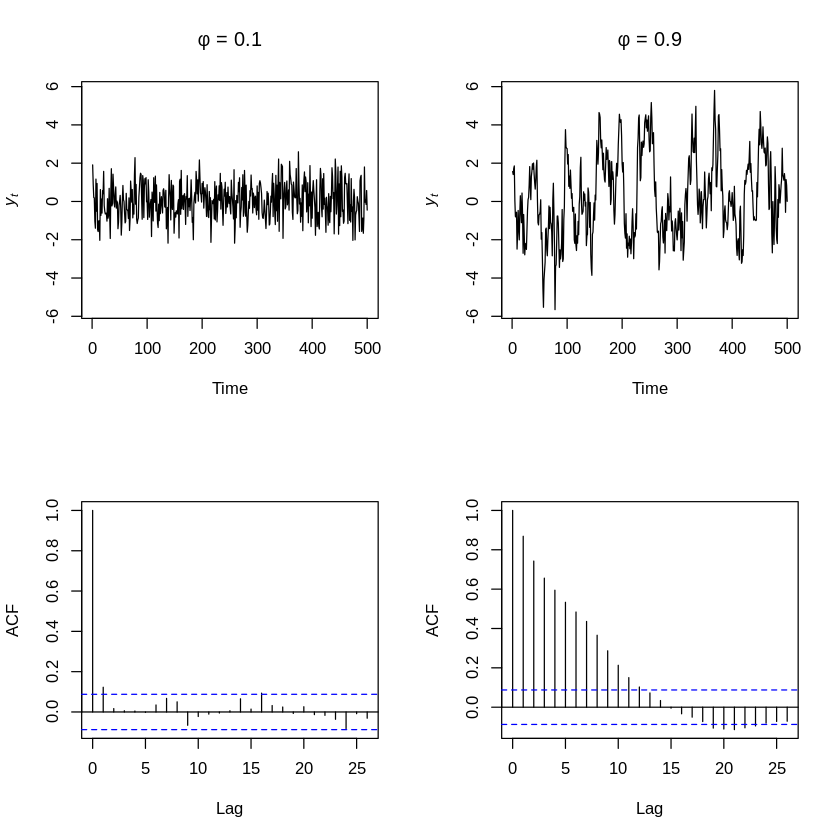

In [27]:
# 2.6.1　ARモデル

# ARモデル
model.small <- list(order = c(1, 0, 0), ar = 0.1, sd = 0.1)　 #AR(1)モデル（φ=0.1）
model.large <- list(order = c(1, 0, 0), ar = 0.9, sd = 0.1)　 #AR(1)モデル（φ=0.9）
AR1.small <- arima.sim(n = 500, model = model.small)  #数値シミュレーション
AR1.large <- arima.sim(n = 500, model = model.large)  #数値シミュレーション

# 描画のセットアップ
par(mfrow = c(2, 2))
ylm <- c(min(AR1.small, AR1.large), max(AR1.small, AR1.large))
# 時系列の描画
plot.ts(AR1.small, ylim = ylm, ylab = expression(italic(y)[italic(t)]), main = expression(paste(phi, " = 0.1")))
plot.ts(AR1.large, ylim = ylm, ylab = expression(italic(y)[italic(t)]), main = expression(paste(phi, " = 0.9")))

# 自己相関関数
acf(AR1.small, main="")
acf(AR1.large, main="")



 ARIMA(2,1,2) with drift         : Inf
 ARIMA(0,1,0) with drift         : 1298.645
 ARIMA(1,1,0) with drift         : 1283.346
 ARIMA(0,1,1) with drift         : 1270.309
 ARIMA(0,1,0)                    : 1296.697
 ARIMA(1,1,1) with drift         : 1267.637
 ARIMA(2,1,1) with drift         : 1269.132
 ARIMA(1,1,2) with drift         : 1269.134
 ARIMA(0,1,2) with drift         : 1268.544
 ARIMA(2,1,0) with drift         : 1279.282
 ARIMA(1,1,1)                    : 1267.255
 ARIMA(0,1,1)                    : 1269.091
 ARIMA(1,1,0)                    : 1281.48
 ARIMA(2,1,1)                    : 1268.896
 ARIMA(1,1,2)                    : 1268.923
 ARIMA(0,1,2)                    : 1267.957
 ARIMA(2,1,0)                    : 1277.484
 ARIMA(2,1,2)                    : Inf

 Best model: ARIMA(1,1,1)                    



Series: data 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.2544  -0.8741
s.e.  0.1194   0.0605

sigma^2 = 20177:  log likelihood = -630.63
AIC=1267.25   AICc=1267.51   BIC=1275.04

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE
Training set -16.06603 139.8986 109.9998 -4.005967 12.78745 0.825499
                    ACF1
Training set -0.03228482

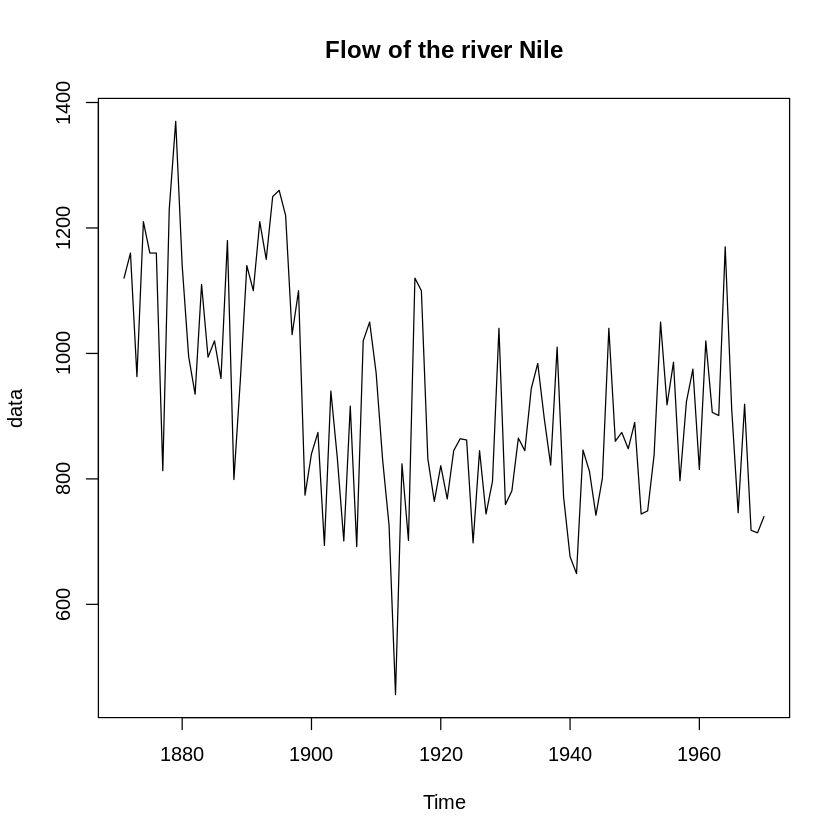


 ARIMA(2,0,2) with non-zero mean : 1266.94
 ARIMA(0,0,0) with non-zero mean : 1269.119
 ARIMA(1,0,0) with non-zero mean : 1265.651
 ARIMA(0,0,1) with non-zero mean : 1265.962
 ARIMA(0,0,0) with zero mean     : 1570.992
 ARIMA(2,0,0) with non-zero mean : 1267.647
 ARIMA(1,0,1) with non-zero mean : 1267.649
 ARIMA(2,0,1) with non-zero mean : Inf
 ARIMA(1,0,0) with zero mean     : 1315.596

 Best model: Regression with ARIMA(1,0,0) errors 



Series: data 
Regression with ARIMA(1,0,0) errors 

Coefficients:
         ar1  intercept       xreg
      0.2304  1071.7244  -221.1050
s.e.  0.0971    30.0549    36.1101

sigma^2 = 17475:  log likelihood = -628.83
AIC=1265.65   AICc=1266.07   BIC=1276.07

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.1232079 130.1964 104.5029 -2.185289 11.90571 0.7842471
                  ACF1
Training set 0.0035207

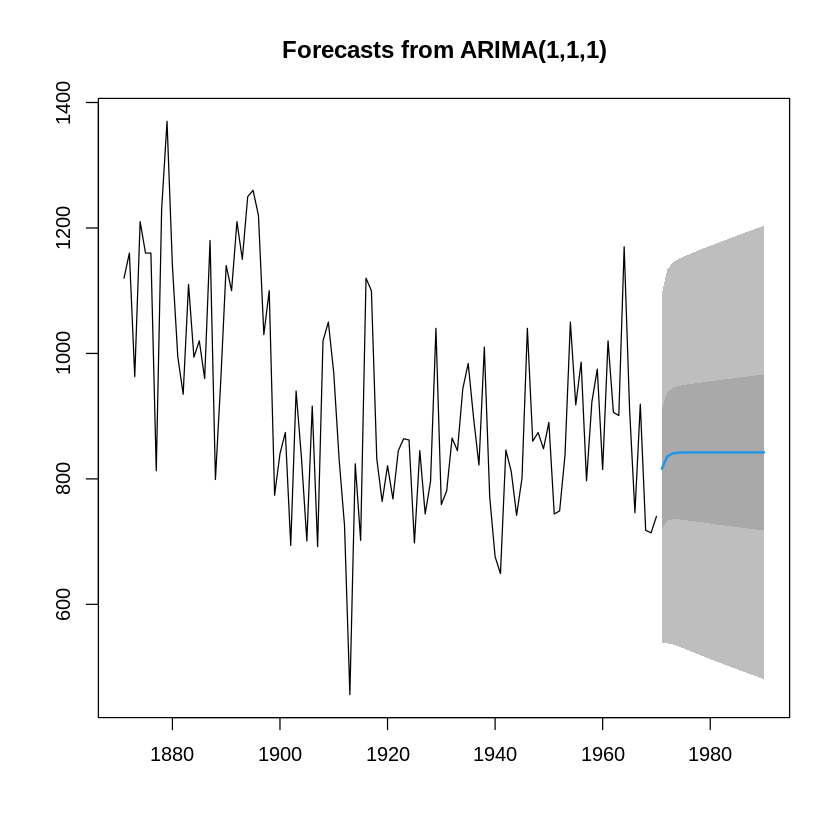

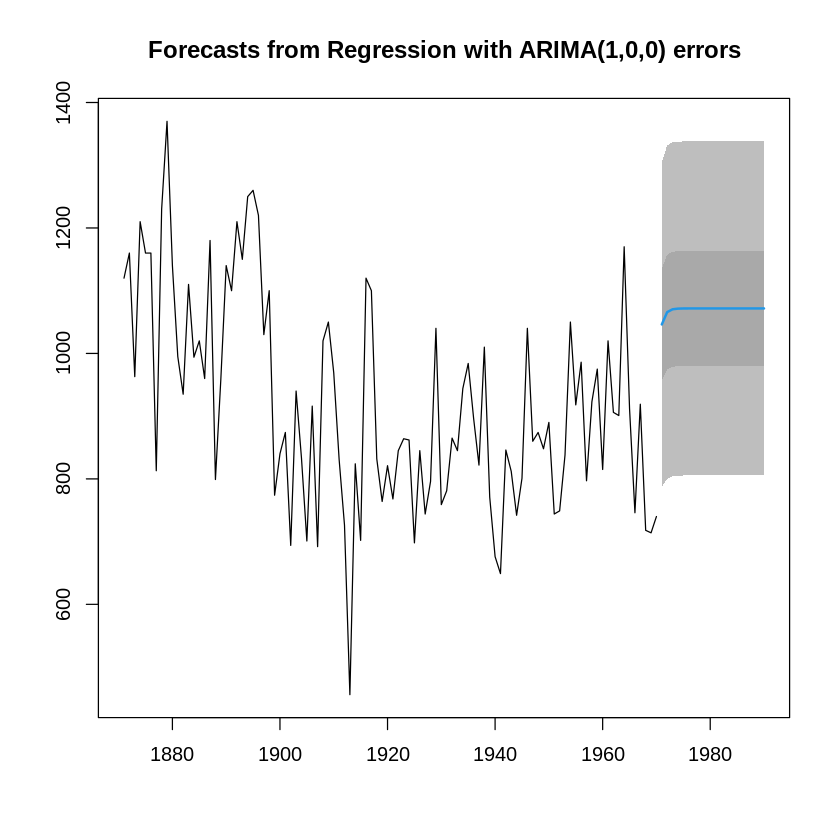

In [26]:
# 2.6.3　ARMA，ARIMA，ARIMAXモデル

library(forecast)

# ARIMAモデル
# アスワンでのナイル川の流量　1871-1970.
data <-ts(Nile, start=1871)
plot(data, main="Flow of the river Nile")
# モデル選択
model <- auto.arima(data, ic="aic", stepwise=T, trace=T)
# 分析結果
summary(model)
# 予測値と信頼区間のプロット（20時点）
plot(forecast(model, level = c(50,95), h =20), shadecols=c("gray","darkgray"))

# ARIMAXモデル
# 外生変数（ダムなし: 1871-1901(31年間)，ダムあり: 1902-1970(69年間)
x <- ts(c(rep(0,31), rep(1,69)))
# モデル選択(xregに外生変数を入れる)
modelx <- auto.arima(data, xreg=x, ic="aic", stepwise=T, trace=T)
summary(modelx)

# ダムが取り壊された場合の将来予測
x_pred <- rep(0, 20) # ダムが取り壊されたと考える（20年分）
plot(forecast(modelx, level = c(50,95), h = 20, xreg = x_pred), shadecols=c("gray", "darkgray"))